In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from mne import io
from mne_connectivity import spectral_connectivity_epochs, seed_target_indices, spectral_connectivity_time, phase_slope_index, viz

os.chdir('C:\\Users\\user1\\Desktop\\Brainihacks\\UnravelData')

In [2]:
data = pd.read_csv('AllData EEG.csv')

#Location of csv files
path = "C:\\Users\\user1\\Desktop\\Brainihacks\\UnravelData\\"
#Used channels (corresponds to dimensions of dataframe)
ch_names = ["ECG", "POz","Fz","Cz" "C3", "C4","F3", "F4", "P3","P4"]


#data = data.drop(data.columns[0], axis = 1)
######data = data.drop(data.columns[12], axis = 1)
#data = data.drop(data.columns[11], axis = 1)


data = data.set_index('Timestamp')

data = data.drop(data.columns[0], axis = 1)
#data = data.drop(data.index[:500])
data

C:\Users\user1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ECG,POz,Fz,Cz,C3,C4,F3,F4,P3,P4,target,participant
Timestamp,,,,,,,,,,,,
20.59075,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
24.49700,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
28.40325,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
32.30950,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
36.21575,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
...,...,...,...,...,...,...,...,...,...,...,...,...
438280.64490,-47.159027,54.511864,36.233746,8.264318,33.835167,101.118561,10.899135,34.246216,30.943817,42.147537,0,1000430
438284.55115,-28.925125,69.186478,57.755417,29.050747,47.036285,124.962875,31.112051,62.896595,35.159069,52.910896,0,1000430
438288.45740,-56.085682,55.262012,43.962883,15.415862,25.510046,121.089844,15.080619,57.946823,14.801480,42.158592,0,1000430


In [3]:

#Type of channels. Choose from eeg or meg (For unicorn it is all eeg)
ch_names = [ "ECG", "POz","Fz","Cz" ,"C3", "C4","F3", "F4", "P3","P4"]

ch_types = ['ecg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
#Sampling frequenty of EEG (For unicorn it is 250 Hz)
sampling_freq = 256  # in Hertz
data

,ECG,POz,Fz,Cz,C3,C4,F3,F4,P3,P4,target,participant
Timestamp,,,,,,,,,,,,
20.59075,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
24.49700,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
28.40325,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
32.30950,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
36.21575,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,-1000.079712,0,1000551
...,...,...,...,...,...,...,...,...,...,...,...,...
438280.64490,-47.159027,54.511864,36.233746,8.264318,33.835167,101.118561,10.899135,34.246216,30.943817,42.147537,0,1000430
438284.55115,-28.925125,69.186478,57.755417,29.050747,47.036285,124.962875,31.112051,62.896595,35.159069,52.910896,0,1000430
438288.45740,-56.085682,55.262012,43.962883,15.415862,25.510046,121.089844,15.080619,57.946823,14.801480,42.158592,0,1000430


In [4]:
raw = data[data['participant'] == '1000430']
raw = data[data['target'] != 0]

print(raw)

                     ECG        POz         Fz         Cz         C3  \
Timestamp                                                              
114997.15325 -149.277161 -77.287018 -82.836617 -86.782349 -73.264496   
115001.05950  -89.450394 -67.226219 -69.836281 -75.044388 -68.520676   
115004.96575  102.496452 -45.217304 -43.983406 -45.994961 -53.568138   
115008.87200  237.649445 -40.485733 -37.464493 -38.921398 -48.563206   
115012.77825  228.911758 -64.180702 -63.168011 -68.305832 -67.539581   
...                  ...        ...        ...        ...        ...   
386452.51990   32.345261  11.990252 -15.500105 -48.811016 -15.744020   
386456.42615   66.280312  30.860889  -1.399366 -31.398132  -4.079237   
386460.33240  122.857330  60.480831  29.999748   3.496004  20.552359   
386464.23865   19.352928  59.210762  32.959106   8.173619  24.163456   
386468.14490  -81.109360  31.493999   6.369664 -21.625355   2.613302   

                     C4         F3         F4         P3       

In [5]:

def LoadData(path, ch_names , ch_types, sampling_freq, startfilter = 1, endfilter = 50):
    #Creates the info for MNE
    info = mne.create_info(ch_names= ch_names, ch_types= ch_types, sfreq= sampling_freq)
    #Creates standard 1020 electrode placement
    standard_1020 = mne.channels.make_standard_montage('standard_1020')
    Participantlili = []
    os.chdir(path)
    participants = list(set(data['participant']))
    
    for a in tqdm(participants, desc = "Loading data: "):
        raw = data[data['participant'] == a]
        #raw = raw[raw['target'] != 0]
        raw = raw.drop('target', axis = 1)
        raw = raw.drop('participant', axis = 1)
        raw = raw.drop(raw.index[:500])
        #print(raw)
        #raw= pd.read_csv(path + a)
        raw = raw[:].transpose()
        raw = sklearn.preprocessing.minmax_scale(raw, axis = 0)
        raw = mne.io.RawArray(raw, info)
        raw = raw.filter(startfilter, endfilter)
        print(len(raw[0][0][0]))
        raw.set_montage(standard_1020)
        #raw.save("EEGDatafiles\\Datafile"+ a[:-5]+".fif")
        if round(len(raw.get_data()[0])/256) >= 180:
            Participantlili.append(raw)
    return Participantlili

In [6]:
                
Participantlili= LoadData(path, ch_names, ch_types, sampling_freq)

print(Participantlili[0])

Loading data:   0%|                                                                             | 0/20 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=10, n_times=101639
    Range : 0 ... 101638 =      0.000 ...   397.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:   5%|███▍                                                                 | 1/20 [00:00<00:12,  1.57it/s]

101639
Creating RawArray with float64 data, n_channels=10, n_times=74806
    Range : 0 ... 74805 =      0.000 ...   292.207 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  10%|██████▉                                                              | 2/20 [00:01<00:08,  2.02it/s]

74806
Creating RawArray with float64 data, n_channels=10, n_times=44946
    Range : 0 ... 44945 =      0.000 ...   175.566 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  15%|██████████▎                                                          | 3/20 [00:01<00:06,  2.54it/s]

44946
Creating RawArray with float64 data, n_channels=10, n_times=128117
    Range : 0 ... 128116 =      0.000 ...   500.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  20%|█████████████▊                                                       | 4/20 [00:01<00:07,  2.06it/s]

128117
Creating RawArray with float64 data, n_channels=10, n_times=49523
    Range : 0 ... 49522 =      0.000 ...   193.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  25%|█████████████████▎                                                   | 5/20 [00:02<00:06,  2.42it/s]

49523
Creating RawArray with float64 data, n_channels=10, n_times=30364
    Range : 0 ... 30363 =      0.000 ...   118.605 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  30%|████████████████████▋                                                | 6/20 [00:02<00:04,  2.92it/s]

30364
Creating RawArray with float64 data, n_channels=10, n_times=59803
    Range : 0 ... 59802 =      0.000 ...   233.602 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  35%|████████████████████████▏                                            | 7/20 [00:02<00:04,  2.94it/s]

59803
Creating RawArray with float64 data, n_channels=10, n_times=70269
    Range : 0 ... 70268 =      0.000 ...   274.484 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  40%|███████████████████████████▌                                         | 8/20 [00:03<00:04,  2.84it/s]

70269
Creating RawArray with float64 data, n_channels=10, n_times=4777
    Range : 0 ... 4776 =      0.000 ...    18.656 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)

4777
Creating RawArray with float64 data, n_channels=10, n_times=62214
    Range : 0 ... 62213 =      0.000 ...   243.020 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-c

Loading data:  50%|██████████████████████████████████                                  | 10/20 [00:03<00:02,  3.48it/s]

62214
Creating RawArray with float64 data, n_channels=10, n_times=119798
    Range : 0 ... 119797 =      0.000 ...   467.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  55%|█████████████████████████████████████▍                              | 11/20 [00:04<00:03,  2.75it/s]

119798
Creating RawArray with float64 data, n_channels=10, n_times=28433
    Range : 0 ... 28432 =      0.000 ...   111.062 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  60%|████████████████████████████████████████▊                           | 12/20 [00:04<00:02,  3.13it/s]

28433
Creating RawArray with float64 data, n_channels=10, n_times=50077
    Range : 0 ... 50076 =      0.000 ...   195.609 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  65%|████████████████████████████████████████████▏                       | 13/20 [00:04<00:02,  3.21it/s]

50077
Creating RawArray with float64 data, n_channels=10, n_times=16243
    Range : 0 ... 16242 =      0.000 ...    63.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  70%|███████████████████████████████████████████████▌                    | 14/20 [00:04<00:01,  3.79it/s]

16243
Creating RawArray with float64 data, n_channels=10, n_times=24349
    Range : 0 ... 24348 =      0.000 ...    95.109 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  75%|███████████████████████████████████████████████████                 | 15/20 [00:04<00:01,  4.19it/s]

24349
Creating RawArray with float64 data, n_channels=10, n_times=129342
    Range : 0 ... 129341 =      0.000 ...   505.238 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  80%|██████████████████████████████████████████████████████▍             | 16/20 [00:05<00:01,  2.85it/s]

129342
Creating RawArray with float64 data, n_channels=10, n_times=55266
    Range : 0 ... 55265 =      0.000 ...   215.879 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  85%|█████████████████████████████████████████████████████████▊          | 17/20 [00:05<00:01,  2.95it/s]

55266
Creating RawArray with float64 data, n_channels=10, n_times=65036
    Range : 0 ... 65035 =      0.000 ...   254.043 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  90%|█████████████████████████████████████████████████████████████▏      | 18/20 [00:06<00:00,  2.91it/s]

65036
Creating RawArray with float64 data, n_channels=10, n_times=61678
    Range : 0 ... 61677 =      0.000 ...   240.926 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data:  95%|████████████████████████████████████████████████████████████████▌   | 19/20 [00:06<00:00,  2.92it/s]

61678
Creating RawArray with float64 data, n_channels=10, n_times=120682
    Range : 0 ... 120681 =      0.000 ...   471.410 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



Loading data: 100%|████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.78it/s]

120682
<RawArray | 10 x 101639 (397.0 s), ~7.8 MB, data loaded>


In [7]:
print(len(Participantlili))

14


In [8]:
#print(Participantlili[0].info["file_id"])
counter = 0

for a in Participantlili:
    counter += 1
    print(counter)
    time = round(len(a.get_data()[0])/256)
    print(time)
    tmin = time-180
    tmax = tmin+120
    a.crop(tmin, tmax)
    
Participantlili[0].info

    


1
397
2
292
3
500
4
193
5
234
6
274
7
243
8
468
9
196
10
505
11
216
12
254
13
241
14
471


<Info | 8 non-empty values
 bads: []
 ch_names: ECG, POz, Fz, Cz, C3, C4, F3, F4, P3, P4
 chs: 1 ECG, 9 EEG
 custom_ref_applied: False
 dig: 12 items (3 Cardinal, 9 EEG)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 10
 projs: []
 sfreq: 256.0 Hz
>

In [9]:
Participantlili[0].info
for a in Participantlili:
    mne.preprocessing.find_ecg_events(a, event_id=999, ch_name=None, tstart=0.0, l_freq=5, h_freq=35, qrs_threshold='auto', filter_length='10s', return_ecg=False, reject_by_annotation=True, verbose=None)
    #mne.filter.notch_filter()
    #Frequencies to notch filter in Hz, e.g. np.arange(60, 241, 60). 
    mne.Annotations(onset=[0, 1,0,0], duration=[1,1,2,60],description=['SquareShown', 'CrossShown', 'NextTrial', 'NextTarget'])


#Annotations(onset=0, duration=[1, 0.25, 0.5],description=['TargetChanged'])


Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 2560 samples (10.000 sec)

Number of ECG events detected : 209 (average pulse 104 / min.)
Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.0

In [10]:
epochlili = []
for a in Participantlili:
    epochs = mne.make_fixed_length_epochs(a, duration=2, preload=True)
    epochlili.append(epochs)

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 512 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 512 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 512 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 512 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 512 original time points ...
0

In [11]:
target = []
for b in range(2):
    for a in range( 30):
        target.append(b)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)

#data_path = sample.data_path()

#subjects_dir = data_path / 'subjects'
#meg_path = data_path / 'MEG' / 'sample'
#raw_fname = meg_path / 'sample_audvis_filt-0-40_raw.fif'
#tmin, tmax = -0.200, 0.500
#event_id = {'Auditory/Left': 1, 'Visual/Left': 3}  # just use two
#raw = mne.io.read_raw_fif(raw_fname)
#raw.pick_types(meg='grad', stim=True, eog=True, exclude=())

# The subsequent decoding analyses only capture evoked responses, so we can
# low-pass the MEG data. Usually a value more like 40 Hz would be used,
# but here low-pass at 20 so we can more heavily decimate, and allow
# the example to run faster. The 2 Hz high-pass helps improve CSP.
#raw.load_data().filter(2, 20)
#events = mne.find_events(raw, 'STI 014')

# Set up bad channels (modify to your needs)
#raw.info['bads'] += ['MEG 2443']  # bads + 2 more

# Read epochs
#epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
#                    picks=('grad', 'eog'), baseline=(None, 0.), preload=True,
#                    reject=dict(grad=4000e-13, eog=150e-6), decim=3,
#                    verbose='error')
#epochs.pick_types(meg=True, exclude='bads')  # remove stim and EOG
#del raw
Xlili = []
ylili = []
y = target
#X = epochs.get_data()  # MEG signals: n_epochs, n_meg_channels, n_times
for a in epochlili:
    Xlili.append(a.get_data())
    ylili.append(y)
 # target: auditory left vs visual left

Xlili = np.array(Xlili)
ylili = np.array(ylili)
Xlili.shape

(14, 60, 10, 512)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.5180013020833333


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.414296875


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.4644205729166667


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.46282552083333334


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.5278385416666667


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.5892838541666666


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.51150390625


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.5192643229166666


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.5189908854166667


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.31195963541666666


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.4469986979166667


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.48729817708333334


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.46650390625000004
0.5559505208333334
0.5559505208333334


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished


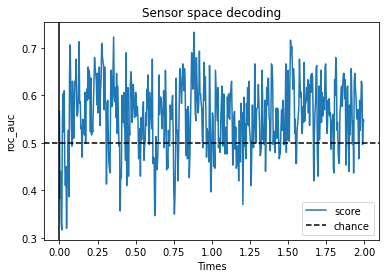

In [27]:
#Problem that it doesn't keep on training. It keeps resetting basically. 
#https://stackoverflow.com/questions/70241246/is-it-possible-to-fit-a-scikit-learn-model-in-a-loop-or-with-an-iterator

#mne.compute_covariance(epochs, keep_sample_mean=True, tmin=None, tmax=None, projs=None, method='empirical', method_params=None, cv=3, scalings=None, n_jobs=None, return_estimators=False, on_mismatch='raise', rank=None, verbose=None)
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.decoding import ReceptiveField, TimeDelayingRidge
from sklearn.svm import SVC
from scipy.stats import multivariate_normal
from scipy.io import loadmat
from sklearn.preprocessing import scale
rng = np.random.RandomState(1337)  # To make this example reproducible
# We will train the classifier on all left visual vs auditory trials on MEG

clf = make_pipeline(
    StandardScaler(),
    Vectorizer(),
    #LogisticRegression(solver='liblinear')
    SVC(gamma = 'scale')
)

# here we use cv=3 just for speed
for a in Xlili:
    
    time_decod = SlidingEstimator(
    clf, n_jobs=1, scoring='roc_auc', verbose=True)
    scores = cross_val_multiscore(time_decod, a, y, cv=3, n_jobs=3)
    scores = np.mean(scores, axis=0)
    print(np.mean(scores))

# Mean scores across cross-validation splits


# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('roc_auc')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
print(np.mean(scores))

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())
print(np.mean(scores))
